In [ ]:
from imports import *
from tools import *

In [ ]:
# Roated the JWST image to match the orientation of the MUSE and HST images
# sips -r -344.4 STScI-01HNGA6XHK8A3YAFYP7XFYWB5E.png -o jwst_hst_rotated.png
# sips -r -344.4 STScI-01HMA442A3CJ423JT25V3FX704.png -o hst_rotated.png
# sips -r -326.1 STScI-01EVVJGTAZ5EVHF1EWS8SH8F06.jpg -o hst_rotated.png

In [ ]:
# Define the colourmap
cmap1 = plt.cm.binary(np.linspace(0., 1, 64))
cmap2 = colorcet.cm.fire(np.linspace(0, 1, 128))
cmaplist = np.vstack((cmap1, cmap2))
cmap = mpl.colors.LinearSegmentedColormap.from_list('my_colormap', cmaplist)
cmap.set_under(cmap(0))
cmap.set_bad(color=cmap(0))

In [ ]:
root_dir = '/Users/abarnes/Dropbox/work/Smallprojects/galaxies'

file_mus = '%s/data_hstha/ngc1672/muse/NGC1672-0.96asec_MAPS.fits' %root_dir 
file_hst = '%s/data_hstha/ngc1672/hst_contsub/ngc1672_hst_ha_sic.fits' %root_dir 
file_hstcat = '%s/data_hstha_nebulae_catalogue/ngc1672/catalogue/ngc1672_mask.fits' %root_dir 
file_muscat = '%s/data_hstha/ngc1672/muse/ngc1672_nebmask.fits' %root_dir 
file_jwst = '%s/data_hstha/ngc1672/jwst/ngc1672_nircam_lv3_f300m_i2d_anchor.fits' %root_dir 

# file_jwst_png = '%s/data_hstha/ngc1672/rgb/STScI-01HNGA6XHK8A3YAFYP7XFYWB5E.png' %root_dir

file_jwst_png = '%s/data_hstha/ngc1672/rgb/jwst_hst_rotated.png' %root_dir
file_hst_png = '%s/data_hstha/ngc1672/rgb/hst_rotated.png' %root_dir

hdu_mus = fits.open(file_mus)['HA6562_FLUX']
hdu_hst = fits.open(file_hst)[0]
hdu_hstcat = fits.open(file_hstcat)[0]
hdu_muscat = fits.open(file_muscat)[0]
hdu_jwst = fits.open(file_jwst)[1]

hdu_hstcat_masked = fits.open(file_hstcat)[0]
hdu_muscat_masked = fits.open(file_muscat)[0]

hdu_hstcat_masked.data = np.array(hdu_hstcat_masked.data, dtype=float)
hdu_muscat_masked.data = np.array(hdu_muscat_masked.data, dtype=float)

hdu_hstcat_masked.data[hdu_hstcat_masked.data==-1] = np.nan
hdu_muscat_masked.data[hdu_muscat_masked.data==-1] = np.nan

In [ ]:
data_png = iio.imread(file_jwst_png)
data_png = data_png[:,:,2]
data_png = data_png[::-1]

data_jwst = hdu_jwst.data.copy()
hdr_jwst = hdu_jwst.header.copy()

print('Shape jwst %i %i' %data_jwst.shape)
print('Shape png %i %i' %data_png.shape)

print('CRVALS %f %f' %(hdr_jwst['CRVAL1'], hdr_jwst['CRVAL2']))
print('CRPIX %f %f' %(hdr_jwst['CRPIX1'], hdr_jwst['CRPIX2']))

crpix1 = (data_png.shape[1]/2) +95
crpix2 = (data_png.shape[0]/2) - 18 

hdr_jwst['CRPIX1'] = crpix1
hdr_jwst['CRPIX2'] = crpix2

hdu_hwst_new = fits.PrimaryHDU(data=data_png, header=hdr_jwst)
hdu_hwst_new.writeto('%s/data_hstha/ngc1672/rgb/tmp_jwst.fits' %root_dir, overwrite=True)

In [ ]:
data_png = iio.imread(file_hst_png)
data_png = data_png[:,:,2]
data_png = data_png[::-1]

data_jwst = hdu_jwst.data.copy()
hdr_jwst = hdu_jwst.header.copy()

print('Shape png %i %i' %data_png.shape)

print('CRVALS %f %f' %(hdr_jwst['CRVAL1'], hdr_jwst['CRVAL2']))
print('CRPIX %f %f' %(hdr_jwst['CRPIX1'], hdr_jwst['CRPIX2']))

crpix1 = (data_png.shape[1]/2) + 180
crpix2 = (data_png.shape[0]/2) + 130

hdr_jwst['CRPIX1'] = crpix1
hdr_jwst['CRPIX2'] = crpix2

hdr_jwst['CDELT1'] = hdr_jwst['CDELT1']*0.795
hdr_jwst['CDELT2'] = hdr_jwst['CDELT2']*0.795

hdu_hst_new = fits.PrimaryHDU(data=data_png, header=hdr_jwst)
hdu_hst_new.writeto('%s/data_hstha/ngc1672/rgb/tmp_hst.fits' %root_dir, overwrite=True)

In [ ]:
table_B22 = QTable.read('/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_misc/pressures_literature/Banres2022_ngc1672/props_all_final.fits')

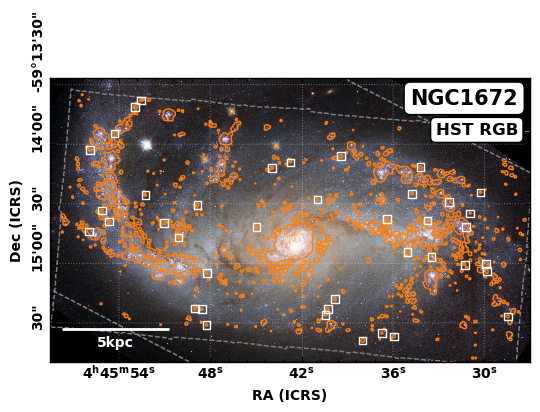

In [121]:
# # Define the region
l = 71.4282219
b = -59.2440003
width = 0.0671941
height = 0.0397296

# Plot the maps
fig = plt.figure(figsize=(5.5, 5.5)) 

ax1 = aplpy.FITSFigure(hdu_hst_new, figure=fig, subplot=(1,1,1))
ax1.show_rgb(file_hst_png)

ax1.show_contour(hdu_hstcat, levels=[0], colors='C1', linewidths=1, smooth=3, rasterized=True)

for ax in [ax1]:

    hdu_mask = fits.PrimaryHDU(~np.isnan(hdu_mus.data)*1, hdu_mus.header)
    ax.show_contour(hdu_mask, levels=[0], colors='grey', linewidths=1, linestyles='--')

    hdu_mask = fits.PrimaryHDU(~np.isnan(hdu_hst.data)*1, hdu_hst.header)
    ax.show_contour(hdu_mask, levels=[0], colors='grey', linewidths=1, linestyles='--')

    ax.recenter(l, b, width=width, height=height)

ax1.show_markers(table_B22['ra_cent'], table_B22['dec_cent'], marker='s', fc='none', ec='white', zorder=10)

ax1.add_label(1-0.025, 0.965, 'NGC1672', relative=True, color='black', bbox=dict(facecolor='white', boxstyle='round', alpha=1), size=15, ha='right', va='top', zorder=15)
ax1.add_label(1-0.025, 0.965-0.12, 'HST RGB', relative=True, color='black', bbox=dict(facecolor='white', boxstyle='round', alpha=1), size=12,  ha='right', va='top', zorder=15)
# ax1.add_label(0.025, 0.15, 'JWST RGB', relative=True, color='black', bbox=dict(facecolor='white', boxstyle='round', alpha=1), size=12, ha='left', va='bottom', zorder=15)

ax1.set_nan_color('lightgrey')
ax1.ticks.set_color('black')
ax1.add_scalebar(5000/(19.2e6/206265)*u.arcsec, corner='bottom left', color='white', linewidth=2)
ax1.scalebar.set_label('5kpc')

for i, ax in enumerate(fig.get_axes()):

    axes = fig.get_axes()
    ra_ = axes[i].coords[0]
    dec_ = axes[i].coords[1]
    dec_.ticklabels.set_rotation(90)
    axes[i].grid(True, alpha=0.35, ls=':', color='white')
    axes[i].set_facecolor('lightgrey')

fig.tight_layout(h_pad=0, w_pad=0)
fig.subplots_adjust(wspace=0, hspace=0)

plt.savefig('./figs/maps_hstmuse_ngc1672_masks_hst.pdf', dpi=150, bbox_inches='tight', transparent=True)

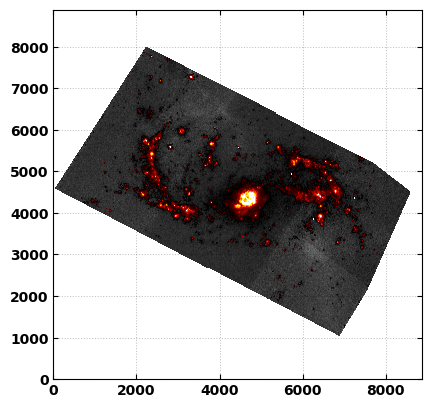

In [173]:
def rescale(x):
    minx = np.nanmin(data[np.isfinite(data)])
    maxx = np.nanmax(data[np.isfinite(data)])
    normalized = (x-minx)/(maxx-minx)
    return(normalized)

data = hdu_hst.data.copy()
data = rescale(data)
data = np.log10(data)
data = rescale(data)
data = np.log10(data)
data = rescale(data)
data = np.log10(data)
data = rescale(data)
data = np.log10(data)
vmin, vmax = np.nanpercentile(data, [0.5, 99.75])
plt.imshow(data, origin='lower', cmap=cmap, vmin=vmin, vmax=vmax)
hdu_hst_resclaed = hdu_hst.copy()
hdu_hst_resclaed.data = data

In [115]:
# # Plot the maps
# fig = plt.figure(figsize=(6, 10)) 

# ax1 = aplpy.FITSFigure(hdu_mus, figure=fig, subplot=(4,1,1))
# ax2 = aplpy.FITSFigure(hdu_hst, figure=fig, subplot=(4,1,2))
# ax3 = aplpy.FITSFigure(hdu_muscat_masked, figure=fig, subplot=(4,1,3))
# ax4 = aplpy.FITSFigure(hdu_hstcat_masked, figure=fig, subplot=(4,1,4))

# vmin1, vmax1 = np.nanpercentile(hdu_mus.data, [1, 99.99])
# vmin2, vmax2 = np.nanpercentile(hdu_hst.data, [10, 99.95])
# vmin3, vmax3 = np.nanpercentile(hdu_muscat.data, [0,100])
# vmin4, vmax4 = np.nanpercentile(hdu_muscat.data, [0,100])

# ax1.show_colorscale(cmap=cmap, stretch='log', vmin=vmin1, vmax=vmax1)
# ax2.show_colorscale(cmap=cmap, stretch='sqrt', vmin=vmin2, vmax=vmax2)
# ax3.show_colorscale(cmap='turbo', stretch='linear', vmin=vmin3, vmax=vmax3)
# ax4.show_colorscale(cmap='turbo', stretch='linear', vmin=vmin4, vmax=vmax4)

# ax1.show_contour(hdu_muscat, levels=[0], colors='black', linewidths=1, smooth=1)
# ax2.show_contour(hdu_hstcat, levels=[0], colors='black', linewidths=1, smooth=3)
# ax3.show_contour(hdu_muscat, levels=[0], colors='black', linewidths=1, smooth=1)
# ax4.show_contour(hdu_hstcat, levels=[0], colors='black', linewidths=1, smooth=3)

# for ax in [ax1, ax2, ax3, ax4]:

#     hdu_mask = fits.PrimaryHDU(~np.isnan(hdu_mus.data)*1, hdu_mus.header)
#     ax.show_contour(hdu_mask, levels=[0], colors='grey', linewidths=1, linestyles='--')

#     hdu_mask = fits.PrimaryHDU(~np.isnan(hdu_hst.data)*1, hdu_hst.header)
#     ax.show_contour(hdu_mask, levels=[0], colors='grey', linewidths=1, linestyles='--')

#     ax.recenter(l, b, width=width, height=height)

# ax1.axis_labels.hide_x()
# ax1.tick_labels.hide_x()
# ax2.axis_labels.hide_x()
# ax2.tick_labels.hide_x()
# ax2.axis_labels.hide_y()
# ax2.tick_labels.hide_y()
# ax4.axis_labels.hide_y()
# ax4.tick_labels.hide_y()

# ax1.add_label(0.035, 0.035, 'NGC 1566', relative=True, color='black', bbox=dict(facecolor='white', boxstyle='round', alpha=1), size=20, ha='left', va='bottom')
# ax1.add_label(0.035, 0.975, 'MUSE', relative=True, color='black', bbox=dict(facecolor='white', boxstyle='round', alpha=1), size=15, ha='left', va='top')
# ax2.add_label(0.035, 0.975, 'HST', relative=True, color='black', bbox=dict(facecolor='white', boxstyle='round', alpha=1), size=15, ha='left', va='top')
# ax3.add_label(0.035, 0.975, 'MUSE catalogue', relative=True, color='black', bbox=dict(facecolor='white', boxstyle='round', alpha=1), size=15, ha='left', va='top')
# ax4.add_label(0.035, 0.975, 'HST catalogue', relative=True, color='black', bbox=dict(facecolor='white', boxstyle='round', alpha=1), size=15, ha='left', va='top')

# for ax in [ax1, ax2, ax3, ax4]:

#     ax.set_nan_color('lightgrey')
#     ax.ticks.set_color('black')

#     ax.add_scalebar(1000/(17.7e6/206265)*u.arcsec, corner='bottom right')
#     ax.scalebar.set_label('1kpc')

# for i, ax in enumerate(fig.get_axes()):

#     axes = fig.get_axes()
#     ra_ = axes[i].coords[0]
#     dec_ = axes[i].coords[1]
#     dec_.ticklabels.set_rotation(90)
#     axes[i].grid(True, alpha=0.35, ls=':', color='white')
#     axes[i].set_facecolor('lightgrey')

# fig.tight_layout(h_pad=0.1, w_pad=0.1)
# fig.subplots_adjust(wspace=-0.05, hspace=0.02)

# plt.savefig('./figs/maps_hstmuse_ngc1672_masks.pdf', dpi=250, bbox_inches='tight', transparent=True)

In [ ]:
# # Plot the maps
# fig1 = plt.figure(figsize=(6, 6)) 
# fig2 = plt.figure(figsize=(6, 6)) 
# fig3 = plt.figure(figsize=(6, 6)) 
# fig4 = plt.figure(figsize=(6, 6)) 

# ax1 = aplpy.FITSFigure(hdu_mus, figure=fig1, subplot=(1,1,1))
# ax2 = aplpy.FITSFigure(hdu_hst, figure=fig2, subplot=(1,1,1))
# ax3 = aplpy.FITSFigure(hdu_muscat_masked, figure=fig3, subplot=(1,1,1))
# ax4 = aplpy.FITSFigure(hdu_hstcat_masked, figure=fig4, subplot=(1,1,1))

# vmin1, vmax1 = np.nanpercentile(hdu_mus.data, [1, 99.99])
# vmin2, vmax2 = np.nanpercentile(hdu_hst.data, [10, 99.95])
# vmin3, vmax3 = np.nanpercentile(hdu_muscat.data, [0,100])
# vmin4, vmax4 = np.nanpercentile(hdu_muscat.data, [0,100])

# ax1.show_colorscale(cmap=cmap, stretch='log', vmin=vmin1, vmax=vmax1)
# ax2.show_colorscale(cmap=cmap, stretch='sqrt', vmin=vmin2, vmax=vmax2)
# ax3.show_colorscale(cmap='turbo', stretch='linear', vmin=vmin3, vmax=vmax3)
# ax4.show_colorscale(cmap='turbo', stretch='linear', vmin=vmin4, vmax=vmax4)

# ax1.show_contour(hdu_muscat, levels=[0], colors='black', linewidths=1, smooth=1)
# ax2.show_contour(hdu_hstcat, levels=[0], colors='black', linewidths=1, smooth=3)
# ax3.show_contour(hdu_muscat, levels=[0], colors='black', linewidths=1, smooth=1)
# ax4.show_contour(hdu_hstcat, levels=[0], colors='black', linewidths=1, smooth=3)

# for ax in [ax1, ax2, ax3, ax4]:

#     hdu_mask = fits.PrimaryHDU(~np.isnan(hdu_mus.data)*1, hdu_mus.header)
#     ax.show_contour(hdu_mask, levels=[0], colors='grey', linewidths=1, linestyles='--')

#     hdu_mask = fits.PrimaryHDU(~np.isnan(hdu_hst.data)*1, hdu_hst.header)
#     ax.show_contour(hdu_mask, levels=[0], colors='grey', linewidths=1, linestyles='--')

#     ax.recenter(l, b, width=width, height=height)

# ax1.axis_labels.hide_x()
# ax1.tick_labels.hide_x()
# ax2.axis_labels.hide_x()
# ax2.tick_labels.hide_x()
# ax2.axis_labels.hide_y()
# ax2.tick_labels.hide_y()
# ax4.axis_labels.hide_y()
# ax4.tick_labels.hide_y()

# ax1.add_label(0.035, 0.035, 'NGC 1566', relative=True, color='black', bbox=dict(facecolor='white', boxstyle='round', alpha=1), size=20, ha='left', va='bottom')
# ax1.add_label(0.035, 0.975, 'MUSE', relative=True, color='black', bbox=dict(facecolor='white', boxstyle='round', alpha=1), size=15, ha='left', va='top')
# ax2.add_label(0.035, 0.975, 'HST', relative=True, color='black', bbox=dict(facecolor='white', boxstyle='round', alpha=1), size=15, ha='left', va='top')
# ax3.add_label(0.035, 0.975, 'MUSE catalogue', relative=True, color='black', bbox=dict(facecolor='white', boxstyle='round', alpha=1), size=15, ha='left', va='top')
# ax4.add_label(0.035, 0.975, 'HST catalogue', relative=True, color='black', bbox=dict(facecolor='white', boxstyle='round', alpha=1), size=15, ha='left', va='top')

# for ax in [ax1, ax2, ax3, ax4]:

#     ax.set_nan_color('lightgrey')
#     ax.ticks.set_color('black')

#     ax.add_scalebar(1000/(17.7e6/206265)*u.arcsec, corner='bottom right')
#     ax.scalebar.set_label('1kpc')

# for fig in [fig1, fig2, fig3, fig4]:

#     for i, ax in enumerate(fig.get_axes()):

#         axes = fig.get_axes()
#         ra_ = axes[i].coords[0]
#         dec_ = axes[i].coords[1]
#         dec_.ticklabels.set_rotation(90)
#         axes[i].grid(True, alpha=0.35, ls=':', color='white')
#         axes[i].set_facecolor('lightgrey')

#     fig.tight_layout(h_pad=0.1, w_pad=0.1)
#     fig.subplots_adjust(wspace=-0.05, hspace=0.02)

# fig1.savefig('./figs/maps_hstmuse_ngc1672_masks1.pdf', dpi=250, bbox_inches='tight', transparent=True)
# fig2.savefig('./figs/maps_hstmuse_ngc1672_masks2.pdf', dpi=250, bbox_inches='tight', transparent=True)
# fig3.savefig('./figs/maps_hstmuse_ngc1672_masks3.pdf', dpi=250, bbox_inches='tight', transparent=True)
# fig4.savefig('./figs/maps_hstmuse_ngc1672_masks4.pdf', dpi=250, bbox_inches='tight', transparent=True)

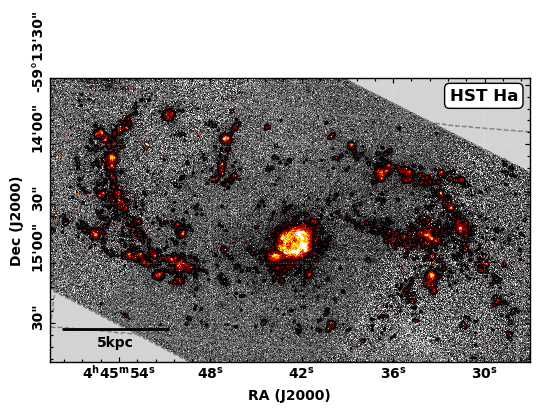

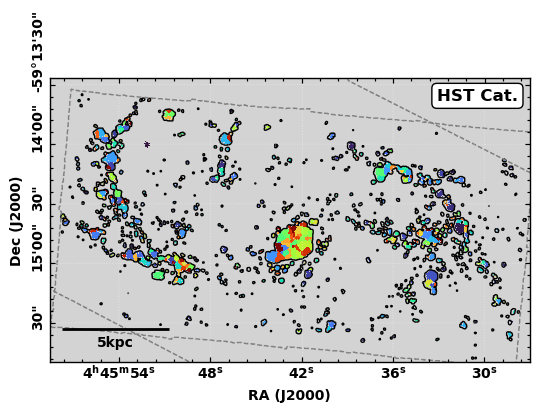

In [178]:
# Plot the maps
fig2 = plt.figure(figsize=(5.5, 5.5)) 
fig3 = plt.figure(figsize=(5.5, 5.5)) 

ax2 = aplpy.FITSFigure(hdu_hst_resclaed, figure=fig2, subplot=(1,1,1))
ax3 = aplpy.FITSFigure(hdu_hstcat_masked, figure=fig3, subplot=(1,1,1))

# vmin2, vmax2 = np.nanpercentile(hdu_hst.data, [10, 99.95])
vmin2, vmax2 = np.nanpercentile(hdu_hst_resclaed.data, [1, 99.9])
# vmin2, vmax2 = np.nanpercentile(hdu_hst.data, [10, 99.9])
vmin3, vmax3 = np.nanpercentile(hdu_hstcat_masked.data, [0,100])

ax2.show_colorscale(cmap=cmap, stretch='linear', vmin=vmin2, vmax=vmax2)
ax3.show_colorscale(cmap='turbo', stretch='linear', vmin=vmin3, vmax=vmax3)

ax2.show_contour(hdu_hstcat, levels=[0], colors='black', linewidths=1, smooth=3)
ax3.show_contour(hdu_hstcat, levels=[0], colors='black', linewidths=1, smooth=3)

for ax in [ax2, ax3]:

    hdu_mask = fits.PrimaryHDU(~np.isnan(hdu_mus.data)*1, hdu_mus.header)
    ax.show_contour(hdu_mask, levels=[0], colors='grey', linewidths=1, linestyles='--')

    hdu_mask = fits.PrimaryHDU(~np.isnan(hdu_hst.data)*1, hdu_hst.header)
    ax.show_contour(hdu_mask, levels=[0], colors='grey', linewidths=1, linestyles='--')

    ax.recenter(l, b, width=width, height=height)


ax2.add_label(1-0.025, 0.965, 'HST Ha', relative=True, color='black', bbox=dict(facecolor='white', boxstyle='round', alpha=1), size=12, ha='right', va='top', zorder=15)
ax3.add_label(1-0.025, 0.965, 'HST Cat.', relative=True, color='black', bbox=dict(facecolor='white', boxstyle='round', alpha=1), size=12, ha='right', va='top', zorder=15)

for ax in [ax2, ax3]:

    ax.set_nan_color('lightgrey')
    ax.ticks.set_color('black')
    ax.add_scalebar(5000/(19.2e6/206265)*u.arcsec, corner='bottom left', color='black', linewidth=2)
    ax.scalebar.set_label('5kpc')

for fig in [fig2, fig3]:

    for i, ax in enumerate(fig.get_axes()):

        axes = fig.get_axes()
        ra_ = axes[i].coords[0]
        dec_ = axes[i].coords[1]
        dec_.ticklabels.set_rotation(90)
        axes[i].grid(True, alpha=0.35, ls=':', color='white')
        axes[i].set_facecolor('lightgrey')

    fig.tight_layout(h_pad=0.1, w_pad=0.1)
    fig.subplots_adjust(wspace=-0.05, hspace=0.02)

fig2.savefig('./figs/maps_hstmuse_ngc1672_masks2.pdf', dpi=250, bbox_inches='tight', transparent=True)
fig3.savefig('./figs/maps_hstmuse_ngc1672_masks3.pdf', dpi=250, bbox_inches='tight', transparent=True)